# Time smoother

this notebook explopres smoothing to ontain a correct time from any shape of "breath" i.e. trailed or begin with non 'breathing ' or ower values with 

import libraries

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob

In [18]:
from resurfemg.tmsisdk_lite import Poly5Reader

C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:321: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(scipy.__version__) >= '1.1':
C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):
C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):


In [25]:
import resurfemg.helper_functions as hf

In [2]:
array1 = np.array([80,0,0,0,0,0,0,2,3,4,5,6,7,8,1,90.8,7,8,7,8,7,9,10,1,20,0,20,0,30,0,48,78,40,50,60,.8,7,8,7,8,7,9,20,30,20,10,2,2,0,0,0,0,0,0,0,0,1,2,1,0,0,10,0,0,0,1,0,1,2,1,2,0])
#plt.plot(array1)

In [3]:
# # smooth based on following numbers

# def array_smooth(array):
#     z_list = []
#     for t in array:
        
#         print(t)
#         y = array[t+1]
#         z = array[t+2]
#         z_list.append(z)
#         print(z_list)
#     #center_ma(t) = mean(obs(t-1), obs(t), obs(t+1))

In [4]:
array1

array([80. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  2. ,  3. ,  4. ,  5. ,
        6. ,  7. ,  8. ,  1. , 90.8,  7. ,  8. ,  7. ,  8. ,  7. ,  9. ,
       10. ,  1. , 20. ,  0. , 20. ,  0. , 30. ,  0. , 48. , 78. , 40. ,
       50. , 60. ,  0.8,  7. ,  8. ,  7. ,  8. ,  7. ,  9. , 20. , 30. ,
       20. , 10. ,  2. ,  2. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  1. ,  2. ,  1. ,  0. ,  0. , 10. ,  0. ,  0. ,  0. ,  1. ,
        0. ,  1. ,  2. ,  1. ,  2. ,  0. ])

In [5]:
list_ = array1
n= len(array1) //10
new_list = np.convolve(list_, np.ones(n), "valid")/n
zeros = np.zeros(n-1)
new_list= np.hstack((new_list,zeros))
new_list

array([11.42857143,  0.28571429,  0.71428571,  1.28571429,  2.        ,
        2.85714286,  3.85714286,  5.        ,  4.85714286, 17.4       ,
       17.82857143, 18.25714286, 18.4       , 18.54285714, 18.4       ,
       19.54285714,  8.        ,  7.14285714,  8.85714286,  7.85714286,
        9.57142857,  8.57142857, 11.57142857, 10.14285714, 16.85714286,
       25.14285714, 30.85714286, 35.14285714, 43.71428571, 39.54285714,
       40.54285714, 34.82857143, 24.68571429, 20.11428571, 13.97142857,
        6.68571429,  9.42857143, 12.71428571, 14.42857143, 14.85714286,
       14.        , 13.28571429, 12.        ,  9.14285714,  4.85714286,
        2.        ,  0.57142857,  0.28571429,  0.        ,  0.        ,
        0.14285714,  0.42857143,  0.57142857,  0.57142857,  0.57142857,
        2.        ,  2.        ,  1.85714286,  1.57142857,  1.57142857,
        1.57142857,  1.71428571,  0.57142857,  0.71428571,  1.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.  

In [6]:
len(array1)

72

In [7]:
len(new_list)

72

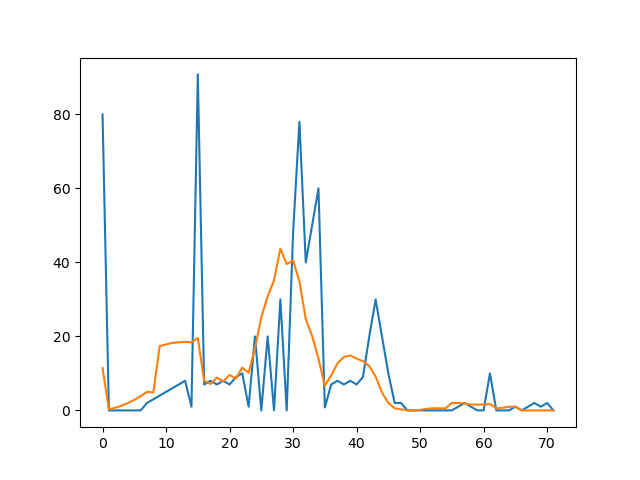

In [8]:
plt.plot(array1)
plt.plot(new_list)

In [9]:
def running_smoother(array):
    """
    This is the smoother to use in time calculations
    """
    n= len(array) //10
    new_list = np.convolve(array, np.ones(n), "valid")/n
    zeros = np.zeros(n-1)
    smoothed_array= np.hstack((new_list,zeros))
    return smoothed_array

In [10]:
sm = running_smoother(array1)

In [11]:
len(sm)

72

In [12]:
plt.plot(sm, color = 'green')

In [13]:
# configure our data
from resurfemg.config import Config
config = Config()
root_emg_directory = config.get_directory('root_emg_directory')

In [14]:
emg_pattern = os.path.join(root_emg_directory, '**/*.Poly5')
emg_and_draeger_files = glob.glob(emg_pattern, recursive=True)

emg_files = []
draeger_files = []

for file in emg_and_draeger_files:
    if 'Draeger' in file:
        draeger_files.append(file)
    else:
        emg_files.append(file)

In [15]:
list_of_numbers_strung = []
for i in range(len(emg_files)):
    list_of_numbers_strung.append(str(i))


btn = widgets.Dropdown(
    options=list_of_numbers_strung,
    value='0',
    description='Picked File:',
    disabled=False,
)
display(btn)

Dropdown(description='Picked File:', options=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '1…

In [20]:
number_chosen = int(btn.value)
file_chosen = emg_files[number_chosen] 
print("The file you chose is:",file_chosen)

The file you chose is: C:/Projects/ReSurfEMG/not_pushed/topspin_data_anonymized\M001\001\EMG_recording.Poly5


In [21]:

data_emg = Poly5Reader(file_chosen)
data_samples= data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)
    converted_to_samples.append(i)

Reading file  C:/Projects/ReSurfEMG/not_pushed/topspin_data_anonymized\M001\001\EMG_recording.Poly5
	 Number of samples:  172576 
	 Number of channels:  3 
	 Sample rate: 2048 Hz
Done reading data.


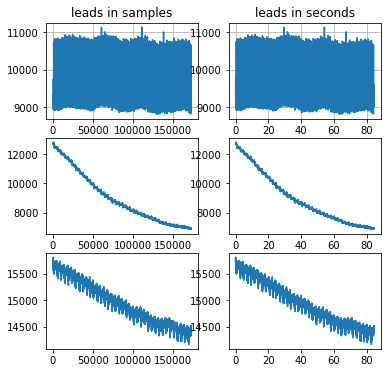

In [22]:
%matplotlib inline
# set up plotn
x = data_samples
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(6, 6))
#ax.set_ylim([-4, 4])
axis[0,0].grid(True)
axis[0,0].plot(x[0])
axis[0,0].set(title='leads in samples')
axis[1,0].plot(x[1])
axis[2,0].plot(x[2])
axis[0,1].set(title='leads in seconds')
axis[0,1].grid(True)
axis[0,1].plot(converted_to_seconds,x[0])
axis[1,1].plot(converted_to_seconds,x[1])
axis[2,1].plot(converted_to_seconds,x[2])

In [26]:

emg = hf.emg_bandpass_butter_sample(
        data_samples,
        5,
        450,
        2048,
        output='sos',
    )
print(np.max(emg[0]), np.min(emg[0]))

1486.8475113550787 -460.73702045264105


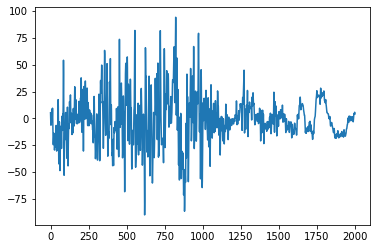

In [47]:
plt.plot(emg[2][0:2000])

In [48]:
smoother = running_smoother(emg[2][0:2000])

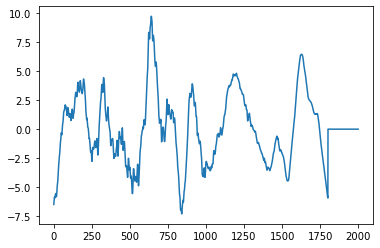

In [49]:
plt.plot(smoother)

In [50]:
def running_smoother5(array):
    """
    This is the smoother to use in time calculations
    """
    n= len(array) //5
    new_list = np.convolve(array, np.ones(n), "valid")/n
    zeros = np.zeros(n-1)
    smoothed_array= np.hstack((new_list,zeros))
    return smoothed_array

def running_smoother50(array):
    """
    This is the smoother to use in time calculations
    """
    n= len(array) //50
    new_list = np.convolve(array, np.ones(n), "valid")/n
    zeros = np.zeros(n-1)
    smoothed_array= np.hstack((new_list,zeros))
    return smoothed_array

In [52]:
smoother50 = running_smoother50(emg[2][0:2000])
smoother5 = running_smoother5(emg[2][0:2000])

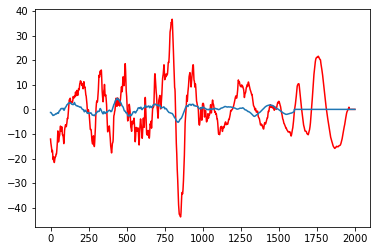

In [53]:
plt.plot(smoother50, color = 'red')
plt.plot(smoother5)

In [54]:
def running_smoother10(array):
    """
    This is the smoother to use in time calculations
    """
    n= len(array) //10
    new_list = np.convolve(array, np.ones(n), "valid")/n
    zeros = np.zeros(n-1)
    smoothed_array= np.hstack((new_list,zeros))
    return smoothed_array

In [75]:
def psuedo_slope(
    array,
    start_index,
    end_index,
):
    """
    This is a function to 
    get the shape, slope or take-off angle
    of the resp. surface EMG signal
    however we are talking about values of
    mV divided by samples (in abs values), not a true slope
    and the number will depend on sampling rate
    and pre-processing, therefore it is reccomended
    only to compare across the same single sample run

    :param array: an array e.g. single lead EMG recording
    :type array: np.array
    :param start_index: which index number the breath starts on
    :type start_index: int
    :param end_index: which index number the breath ends on
    :type end_index: int
    :returns: psuedoslope 
    :rtype: float
    """
    breath_arc = array[start_index:end_index]
    pos_arc = abs(breath_arc)
    smoothed_breath = running_smoother(pos_arc)
    abs_time = smoothed_breath.argmax()
    abs_height = pos_arc[abs_time]
    psuedoslope= abs_height / abs_time
    return psuedoslope

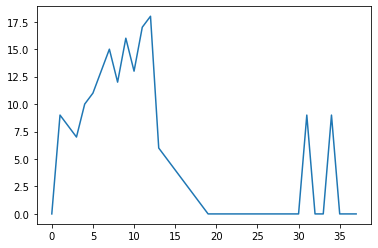

In [82]:
test_arr_1 = np.array([0,9,8,7,10,11,13,15,12,16,13,17,18,6,5,4,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,9,0,0,0])
plt.plot(test_arr_1)

In [ ]:
len(test_arr_1)

In [ ]:
test_arr_1[17]

In [ ]:
psuedo_slope(test_arr_1, 0,17)